# Import libraries

In [110]:
import pyodbc

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

# Database connection

In [35]:
# Setting up the connection to the Azure SQL Server Database
serverName = "sqlserver-pw.database.windows.net" 
databaseName = "db-ai"
username = "girls"
password = "Password?"

cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+serverName+';DATABASE='+databaseName+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

# Executing SQL query and loading data into a dataframe
query = "SELECT [Canale], [CodAgenzia], [ClusterAgenzia], [CodContratto], [CategoriaCespite], [Cespite], [TipologiaUtenza], [DataTrasf.entr.], [MotivoBloccoCalc.], [Anagrafica], [SettoreMerceologico], [ListinoProposto], [Soc.Vend.Prec.], [ClusterSocVend], [Localita], [Provincia], [RegioneItaliana], [Zona], [ModoPagamento], [Permanenza], [Acquisizione], [UltimoReddito], [BEP], [MesiAttivi], [MesiBEP] FROM try.DatiConsumi_ML"
df = pd.read_sql(query, cnxn)

# Displaying the first 20 rows of the dataframe
df.head(20)

C:\Users\ValeriaGucciardo\AppData\Local\Temp\ipykernel_13392\1231934210.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnxn)


,Canale,CodAgenzia,ClusterAgenzia,CodContratto,CategoriaCespite,Cespite,TipologiaUtenza,DataTrasf.entr.,MotivoBloccoCalc.,Anagrafica,...,Provincia,RegioneItaliana,Zona,ModoPagamento,Permanenza,Acquisizione,UltimoReddito,BEP,MesiAttivi,MesiBEP
0,6,1,1,203252,5,4,3,2016-10-01,16,52,...,76,15,3,1,11.1,17.35,-45.6,0,11,11
1,6,1,1,230585,5,4,3,2017-01-01,3,57,...,22,4,3,1,11.1,15.85,-44.1,0,11,11
2,6,1,1,230586,5,4,3,2017-01-01,3,5,...,59,4,3,1,11.1,15.85,-44.1,0,11,11
3,6,1,1,230588,5,4,3,2017-01-01,3,44,...,22,4,2,1,11.1,15.85,-44.1,0,11,11
4,6,1,1,230591,5,4,3,2017-01-01,3,44,...,22,4,2,1,11.1,15.85,-44.1,0,11,11
5,6,1,1,230592,5,4,3,2017-01-01,3,66,...,23,15,3,1,11.1,15.85,-44.1,0,11,11
6,6,1,1,230603,5,4,3,2017-01-01,3,5,...,46,13,3,1,11.1,15.85,-44.1,0,11,11
7,6,1,1,230605,5,4,3,2017-01-01,3,49,...,59,4,3,1,11.1,15.85,-44.1,0,11,11
8,6,1,1,230611,5,4,3,2017-01-01,3,46,...,22,4,3,1,11.1,15.85,-44.1,0,11,11
9,6,1,1,230618,5,4,3,2017-01-01,16,53,...,59,4,3,1,11.1,17.35,-45.6,0,11,11


# Exploratory Data Analysis

In [3]:
# Displaying information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474957 entries, 0 to 474956
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Canale               474957 non-null  object 
 1   CodAgenzia           474957 non-null  object 
 2   ClusterAgenzia       474957 non-null  object 
 3   CodContratto         474957 non-null  object 
 4   CategoriaCespite     474957 non-null  object 
 5   Cespite              474957 non-null  object 
 6   TipologiaUtenza      474957 non-null  object 
 7   DataTrasf.entr.      474957 non-null  object 
 8   MotivoBloccoCalc.    474957 non-null  object 
 9   Anagrafica           474957 non-null  object 
 10  SettoreMerceologico  474957 non-null  object 
 11  ListinoProposto      474957 non-null  object 
 12  Soc.Vend.Prec.       474725 non-null  object 
 13  ClusterSocVend       474957 non-null  object 
 14  Localita             474957 non-null  object 
 15  Provincia        

In [4]:
# Checking for missing values in the dataframe
df.isnull().sum()

Canale                   0
CodAgenzia               0
ClusterAgenzia           0
CodContratto             0
CategoriaCespite         0
Cespite                  0
TipologiaUtenza          0
DataTrasf.entr.          0
MotivoBloccoCalc.        0
Anagrafica               0
SettoreMerceologico      0
ListinoProposto          0
Soc.Vend.Prec.         232
ClusterSocVend           0
Localita                 0
Provincia                0
RegioneItaliana          0
Zona                     0
ModoPagamento            0
Permanenza               0
Acquisizione             0
UltimoReddito            0
BEP                      0
dtype: int64

In [36]:
# Dropping rows with missing values in the Soc.Vend.Prec. column
df.dropna(subset=["Soc.Vend.Prec."], inplace=True)

In [37]:
# Extracting year, month, and day from the DataTrasf.entr. column
df['Anno_Trasf.entr.'] = pd.to_datetime(df['DataTrasf.entr.']).dt.year
df['Mese_Trasf.entr.'] = pd.to_datetime(df['DataTrasf.entr.']).dt.month
df['Giorno_Trasf.entr.'] = pd.to_datetime(df['DataTrasf.entr.']).dt.day

# Dropping the original column
df = df.drop(["DataTrasf.entr."], axis=1)

# Converting columns from object to integer type
int_columns = ["Canale", "CodAgenzia", "ClusterAgenzia", "CodContratto", "Cespite", "MotivoBloccoCalc.", "Anagrafica", "SettoreMerceologico", "ListinoProposto", "Soc.Vend.Prec.", "ClusterSocVend", "Localita", "Provincia", "RegioneItaliana", "Zona", "ModoPagamento", "Permanenza", "Acquisizione", "UltimoReddito", "BEP"]
df[int_columns] = df[int_columns].astype(int)

In [7]:
# Displaying descriptive statistics of the DataFrame
df.describe()

,Canale,CodAgenzia,ClusterAgenzia,CodContratto,Cespite,MotivoBloccoCalc.,Anagrafica,SettoreMerceologico,ListinoProposto,Soc.Vend.Prec.,...,RegioneItaliana,Zona,ModoPagamento,Permanenza,Acquisizione,UltimoReddito,BEP,Anno_Trasf.entr.,Mese_Trasf.entr.,Giorno_Trasf.entr.
count,474725.000000,474725.000000,474725.000000,474725.000000,474725.000000,474725.000000,474725.000000,474725.000000,474725.000000,474725.000000,...,474725.000000,474725.000000,474725.000000,474725.000000,474725.000000,474725.000000,474725.000000,474725.000000,474725.000000,474725.000000
mean,4.606056,1.704581,1.789666,237403.597609,3.512332,13.980669,57.598243,1.356994,6.746767,258.872101,...,10.553548,2.601639,1.630403,15.615504,17.321725,-25.448441,0.284097,2017.188090,6.607676,1.000324
std,1.244426,1.562981,1.357455,137097.638928,0.718040,3.869113,22.998700,0.479114,1.811774,139.241454,...,5.011877,0.648933,0.910657,15.880255,14.414389,103.802941,0.450984,1.793111,3.400345,0.071102
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,8.000000,-175.000000,0.000000,2015.000000,1.000000,1.000000
25%,4.000000,1.000000,1.000000,118678.000000,3.000000,14.000000,47.000000,1.000000,7.000000,254.000000,...,7.000000,2.000000,1.000000,4.000000,10.000000,-100.000000,0.000000,2016.000000,4.000000,1.000000
50%,4.000000,1.000000,1.000000,237358.000000,4.000000,16.000000,61.000000,1.000000,7.000000,256.000000,...,12.000000,3.000000,1.000000,11.000000,11.000000,-56.000000,0.000000,2017.000000,7.000000,1.000000
75%,6.000000,2.000000,2.000000,356130.000000,4.000000,16.000000,75.000000,2.000000,7.000000,292.000000,...,16.000000,3.000000,3.000000,22.000000,17.000000,13.000000,1.000000,2019.000000,9.000000,1.000000
max,7.000000,9.000000,5.000000,474938.000000,5.000000,17.000000,99.000000,2.000000,9.000000,752.000000,...,19.000000,3.000000,3.000000,82.000000,59.000000,499.000000,1.000000,2020.000000,12.000000,26.000000


C:\Users\ValeriaGucciardo\AppData\Local\Temp\ipykernel_13392\3062690610.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['Permanenza', 'UltimoReddito', 'TipologiaUtenza', 'MotivoBloccoCalc.', 'Anagrafica']].corr()


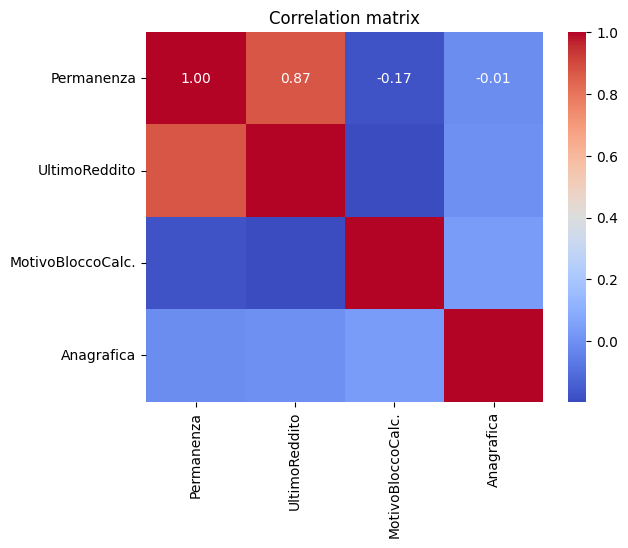

In [8]:
# Displaying the correlation matrix with a heatmap
correlation_matrix = df[['Permanenza', 'UltimoReddito', 'TipologiaUtenza', 'MotivoBloccoCalc.', 'Anagrafica']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

# Models

In [38]:
# Splitting the dataset into features and target variable
X = df.drop(["UltimoReddito"], axis=1)
y = df["UltimoReddito"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model creation and Density of residual errors

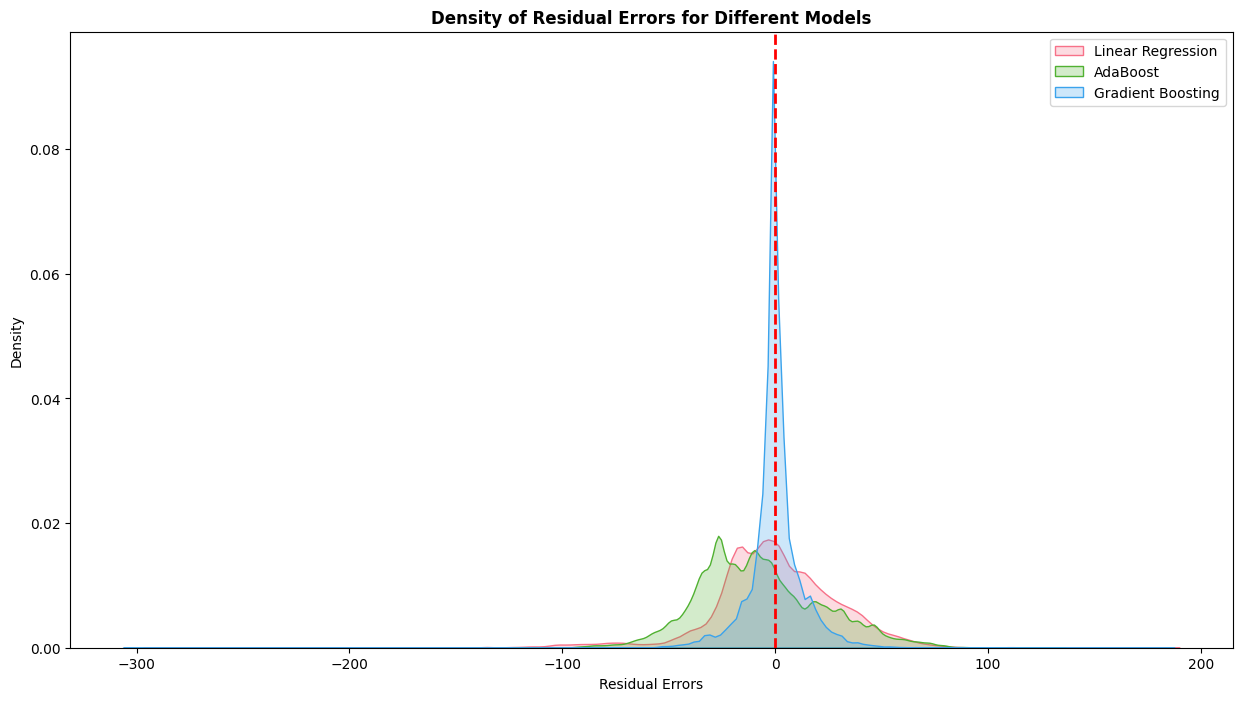

In [115]:
# Model creation
linear_model = LinearRegression()
adaboost_model = AdaBoostRegressor()
gradientboost_model = GradientBoostingRegressor()

# List of models
models = [linear_model, adaboost_model, gradientboost_model]
model_names = ['Linear Regression', 'AdaBoost', 'Gradient Boosting']

# Figure creation
plt.figure(figsize=(15, 8))

# Loop through the models
for i, (model, name) in enumerate(zip(models, model_names)):
    # Model training
    model.fit(X, y)
    
    # Prediction
    y_pred = model.predict(X)
    
    # Calculation of residual errors
    residuals = y - y_pred
    
    # Plotting the density of residual errors
    sns.kdeplot(residuals, label=name, fill=True, color=sns.color_palette("husl", len(models))[i])

# Vertical line to represent zero
plt.axvline(0, color='red', linestyle='--', linewidth=2)

# Titles and labels
plt.title('Density of Residual Errors for Different Models', fontweight='bold')
plt.xlabel('Residual Errors')
plt.ylabel('Density')

# Legend
plt.legend()

# Show the plot
plt.show()

# Study of outliers

In [125]:
# Filtering DataFrame for BEP = 0
df_bep_0 = df[df['BEP'] == 0]

# Filtering DataFrame for BEP = 1
df_bep_1 = df[df['BEP'] == 1]

# Specify the variables of interest
variables = ['UltimoReddito', 'MesiAttivi', 'MesiBEP']

In [135]:
# Calculate descriptive statistics of outliers for the first dataset (BEP = 0)
outliers_stats_bep_0 = df_bep_0[['UltimoReddito', 'MesiAttivi', 'MesiBEP']].describe(percentiles=[.25, .75]).transpose()

# Calculate outliers' bounds for the first dataset
Q1_bep_0 = outliers_stats_bep_0['25%']
Q3_bep_0 = outliers_stats_bep_0['75%']

IQR_bep_0 = Q3_bep_0 - Q1_bep_0

lower_bound_bep_0 = Q1_bep_0 - 1.5 * IQR_bep_0
upper_bound_bep_0 = Q3_bep_0 + 1.5 * IQR_bep_0

# Identify outliers for the first dataset
outliers_bep_0 = df_bep_0[
    (df_bep_0['UltimoReddito'] < lower_bound_bep_0['UltimoReddito']) |
    (df_bep_0['UltimoReddito'] > upper_bound_bep_0['UltimoReddito']) |
    (df_bep_0['MesiAttivi'] < lower_bound_bep_0['MesiAttivi']) |
    (df_bep_0['MesiAttivi'] > upper_bound_bep_0['MesiAttivi']) |
    (df_bep_0['MesiBEP'] < lower_bound_bep_0['MesiBEP']) |
    (df_bep_0['MesiBEP'] > upper_bound_bep_0['MesiBEP'])
]

# Calculate descriptive statistics of outliers for the second dataset (BEP = 1)
outliers_stats_bep_1 = df_bep_1[['UltimoReddito', 'MesiAttivi', 'MesiBEP']].describe(percentiles=[.25, .75]).transpose()

# Calculate outliers' bounds for the second dataset
Q1_bep_1 = outliers_stats_bep_1['25%']
Q3_bep_1 = outliers_stats_bep_1['75%']

IQR_bep_1 = Q3_bep_1 - Q1_bep_1

lower_bound_bep_1 = Q1_bep_1 - 1.5 * IQR_bep_1
upper_bound_bep_1 = Q3_bep_1 + 1.5 * IQR_bep_1

# Identify outliers for the second dataset
outliers_bep_1 = df_bep_1[
    (df_bep_1['UltimoReddito'] < lower_bound_bep_1['UltimoReddito']) |
    (df_bep_1['UltimoReddito'] > upper_bound_bep_1['UltimoReddito']) |
    (df_bep_1['MesiAttivi'] < lower_bound_bep_1['MesiAttivi']) |
    (df_bep_1['MesiAttivi'] > upper_bound_bep_1['MesiAttivi']) |
    (df_bep_1['MesiBEP'] < lower_bound_bep_1['MesiBEP']) |
    (df_bep_1['MesiBEP'] > upper_bound_bep_1['MesiBEP'])
]

# Calculate descriptive statistics of outliers for the first dataset (BEP = 0)
outliers_stats_bep_0 = outliers_bep_0.describe().transpose()

# Calculate descriptive statistics of outliers for the second dataset (BEP = 1)
outliers_stats_bep_1 = outliers_bep_1.describe().transpose()

# Create a DataFrame with descriptive statistics of outliers
outliers_df = pd.DataFrame({
    'Outliers_BEP0_Count': outliers_stats_bep_0['count'],
    'Outliers_BEP0_Mean': outliers_stats_bep_0['mean'],
    'Outliers_BEP0_Std': outliers_stats_bep_0['std'],
    'Outliers_BEP0_Min': outliers_stats_bep_0['min'],
    'Outliers_BEP0_25%': outliers_stats_bep_0['25%'],
    'Outliers_BEP0_50%': outliers_stats_bep_0['50%'],
    'Outliers_BEP0_75%': outliers_stats_bep_0['75%'],
    'Outliers_BEP0_Max': outliers_stats_bep_0['max'],
    'Outliers_BEP1_Count': outliers_stats_bep_1['count'],
    'Outliers_BEP1_Mean': outliers_stats_bep_1['mean'],
    'Outliers_BEP1_Std': outliers_stats_bep_1['std'],
    'Outliers_BEP1_Min': outliers_stats_bep_1['min'],
    'Outliers_BEP1_25%': outliers_stats_bep_1['25%'],
    'Outliers_BEP1_50%': outliers_stats_bep_1['50%'],
    'Outliers_BEP1_75%': outliers_stats_bep_1['75%'],
    'Outliers_BEP1_Max': outliers_stats_bep_1['max']
})

# Save the DataFrame to a CSV file
outliers_df.to_csv('Outliers_stats.csv')

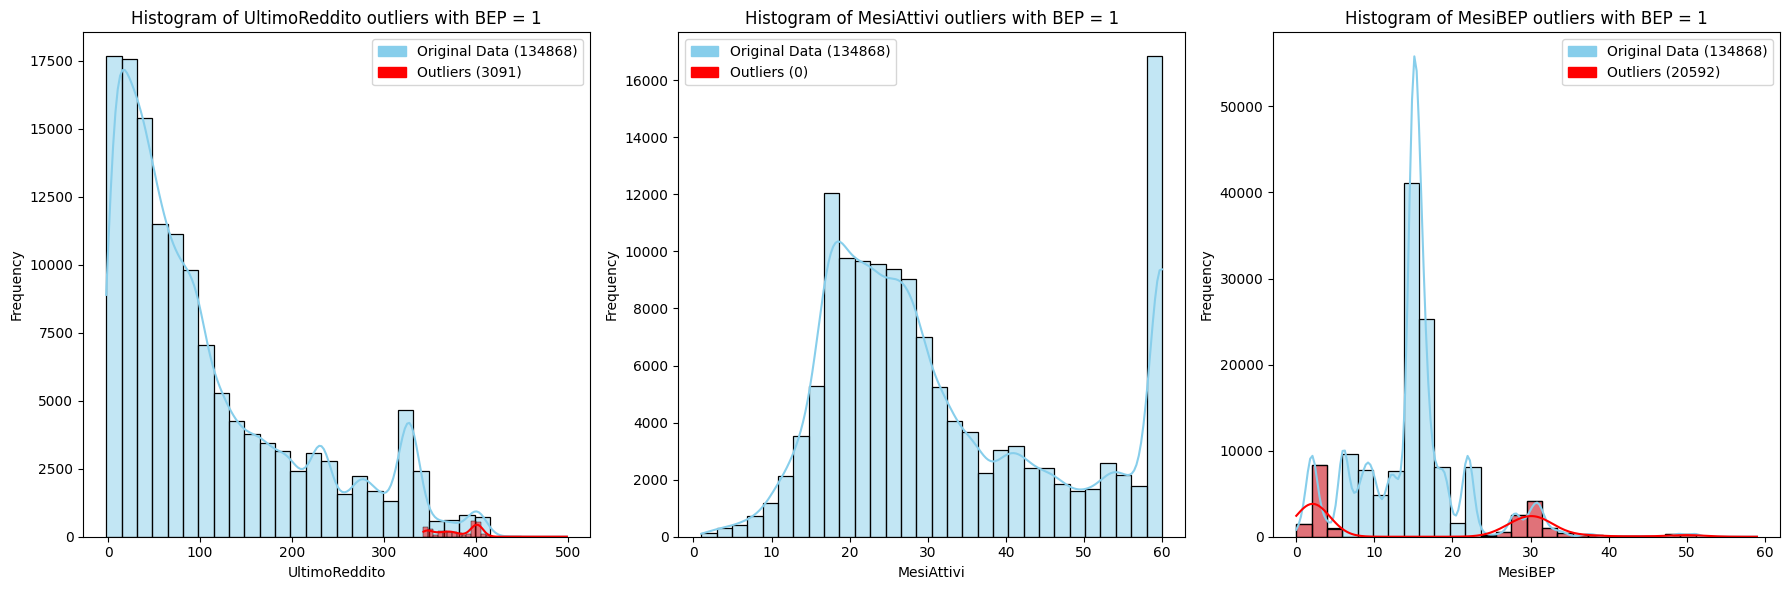

In [128]:
# Set up subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(18, 6))

for i, var in enumerate(variables):
    # Percentiles
    Q1 = df_bep_1[var].quantile(0.25)
    Q3 = df_bep_1[var].quantile(0.75)

    # Interquartile range
    IQR = Q3 - Q1

    # Find outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df_bep_1[(df_bep_1[var] < lower_bound) | (df_bep_1[var] > upper_bound)]

    # Histogram
    sns.histplot(df_bep_1[var], bins=30, kde=True, color='skyblue', label='Original data', ax=axes[i])
    sns.histplot(outliers[var], bins=30, kde=True, color='red', label='Outliers', ax=axes[i])
    
    axes[i].set_title(f'Histogram of {var} outliers with BEP = 1')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

    # Get handles and legend labels
    handles = [Patch(color='skyblue', label=f'Original Data ({len(df_bep_1)})'),
               Patch(color='red', label=f'Outliers ({len(outliers)})')]
    axes[i].legend(handles=handles)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

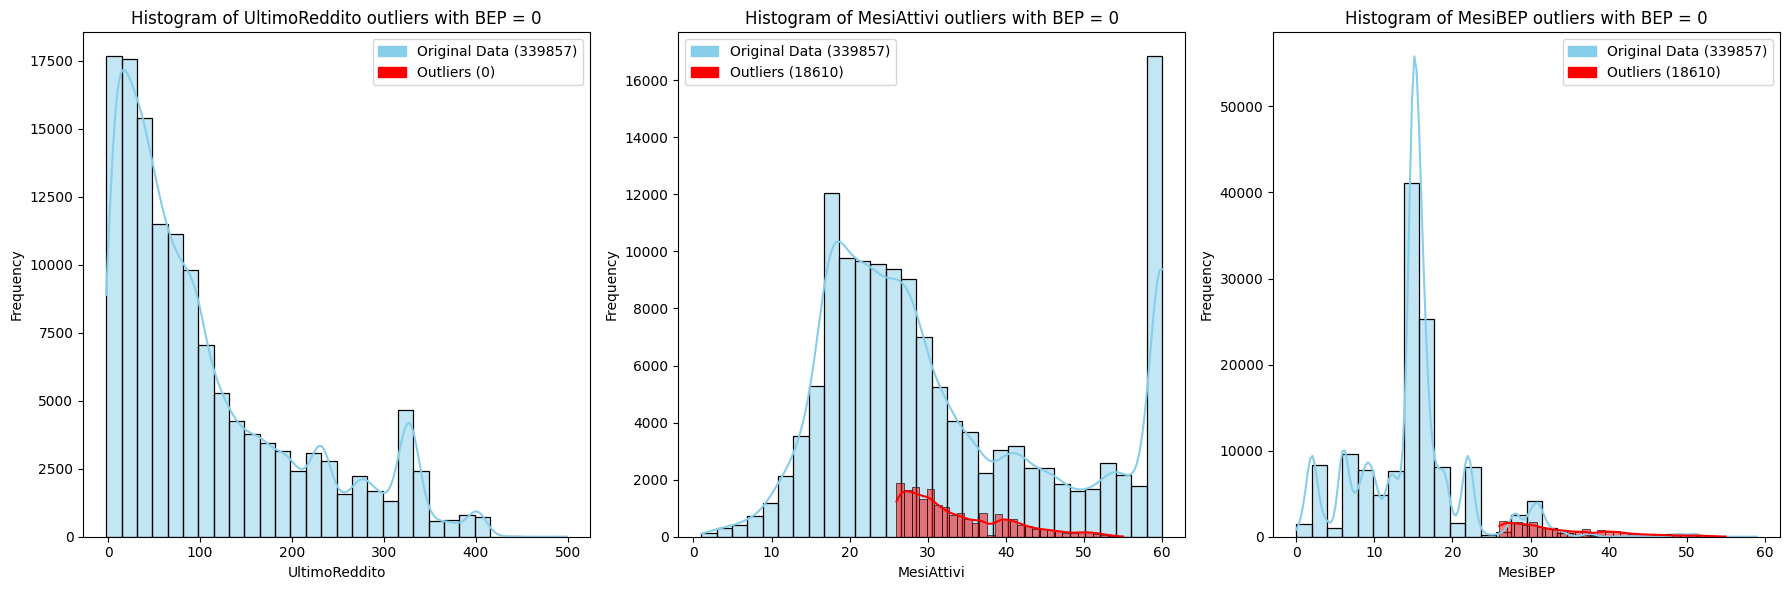

In [129]:
# Set up subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(18, 6))

for i, var in enumerate(variables):
    # Percentiles
    Q1 = df_bep_0[var].quantile(0.25)
    Q3 = df_bep_0[var].quantile(0.75)

    # Interquartile range
    IQR = Q3 - Q1

    # Find outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df_bep_0[(df_bep_0[var] < lower_bound) | (df_bep_0[var] > upper_bound)]

    # Histogram
    sns.histplot(df_bep_1[var], bins=30, kde=True, color='skyblue', label='Original data', ax=axes[i])
    sns.histplot(outliers[var], bins=30, kde=True, color='red', label='Outliers', ax=axes[i])
    
    axes[i].set_title(f'Histogram of {var} outliers with BEP = 0')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

    # Get handles and legend labels
    handles = [Patch(color='skyblue', label=f'Original Data ({len(df_bep_0)})'),
               Patch(color='red', label=f'Outliers ({len(outliers)})')]
    axes[i].legend(handles=handles)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

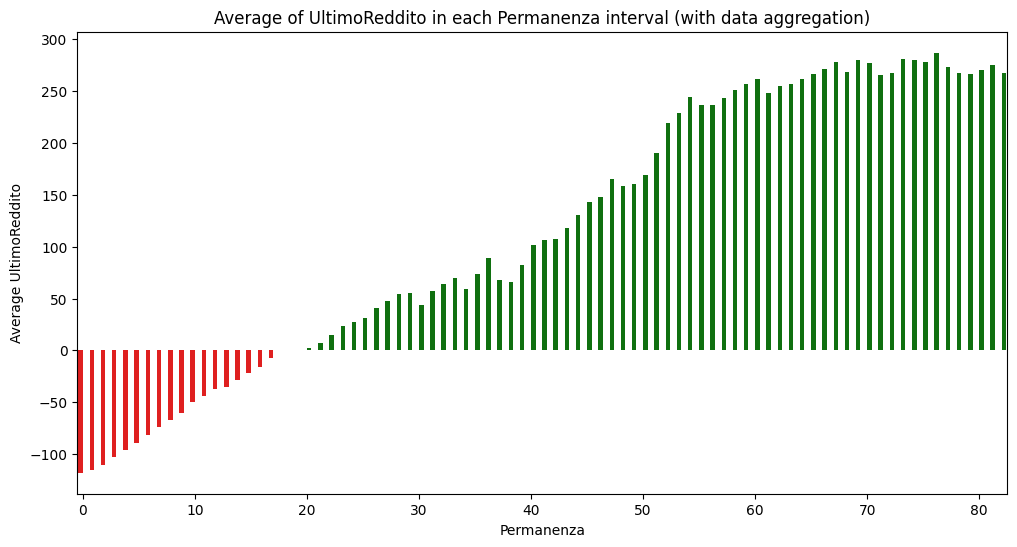

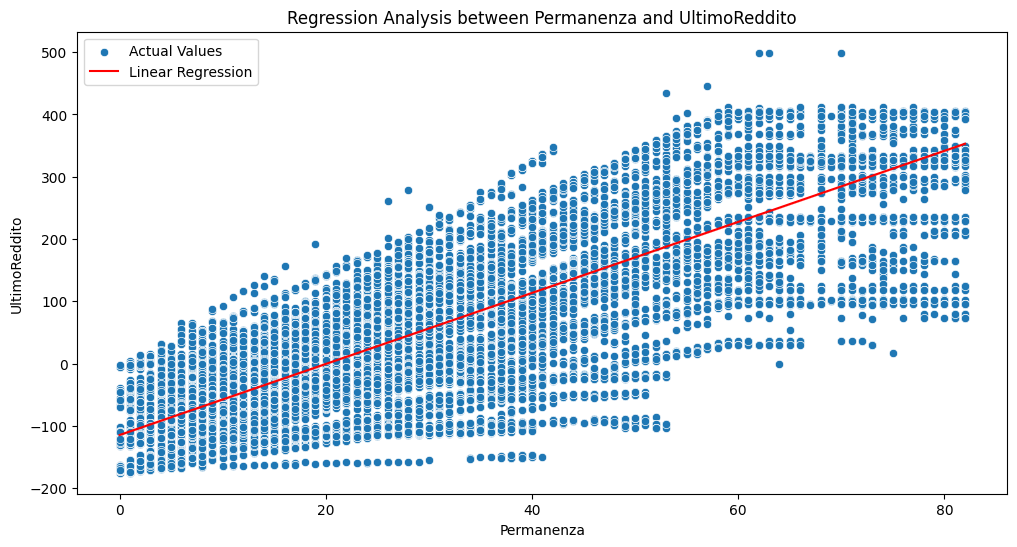

In [134]:
# Aggregation of data by 'Permanenza'
df_aggregato = df.groupby('Permanenza').agg({'UltimoReddito': 'mean'}).reset_index()

# Create a 'Color' column based on the condition
df_aggregato['Colore'] = ['Rosso' if valore < 0 else 'Verde' for valore in df_aggregato['UltimoReddito']]

# Create a custom color map
mappa_colori = {'Rosso': 'red', 'Verde': 'green'}

# Visualization with bar plot and custom colors
plt.figure(figsize=(12, 6))
sns.barplot(x='Permanenza', y='UltimoReddito', hue='Colore', data=df_aggregato, palette=mappa_colori)
plt.title('Average of UltimoReddito in each Permanenza interval (with data aggregation)')
plt.xlabel('Permanenza')
plt.ylabel('Average UltimoReddito')
plt.xticks(range(0, df_aggregato['Permanenza'].max() + 1, 10))
plt.legend().set_visible(False)     # Remove the legend
plt.show()

# Regression Analysis
X_perm = df[['Permanenza']]         # Feature
y_ulred = df['UltimoReddito']       # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_perm, y_ulred, test_size=0.2, random_state=42)

# Create and train the linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg_model.predict(X_test)

# Display the regression on the test set
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_test['Permanenza'], y=y_test, label='Actual Values')
sns.lineplot(x=X_test['Permanenza'], y=y_pred, color='red', label='Linear Regression')
plt.title('Regression Analysis between Permanenza and UltimoReddito')
plt.xlabel('Permanenza')
plt.ylabel('UltimoReddito')
plt.legend()
plt.show()

Nonostante dovremmo lavorare su 60 mesi, il grafico arriva a poco più di 80, quindi vedendolo, la prima cosa che si pensa è di limitare la x a 60.

Se su SQL eseguiamo la seguente Query:

    SELECT [CodAgenzia]
    ,count ([CodAgenzia])over (partition by [CodAgenzia]) as Prova
    ,[Permanenza]
    FROM [try].[DatiConsumi_ML]
    WHERE DATEDIFF(month,[DataTrasf.entr.],[DataTrasf.usc.]) >60
    ORDER BY [CodAgenzia] desc

Notiamo che abbiamo 13447 righe con valori fino ad 82.1 mesi (il 2.83%), questo si verifica perchè alcune aziende sono presenti già dal 1 gennaio 2015

Non avendo dati superiori a 60 mesi, i valori che li superano sono semplicemente copie dell'ultimo valore che abbiamo per quelle aziende

---

Se volessimo correggere il grafico basterebe modificare il codice in questo modo:

    # Per impostare i limiti dell'asse X da 0 a 60
    plt.xlim(0, 60)
    # Per impostare i limiti dell'asse Y in modo appropriato per una buona visualizzazione
    plt.ylim(min(y_test.min(), y_pred.min()) - 5, max(y_test.max(), y_pred.max()) + 5)
    plt.show()